In [1]:
import numpy as np
import pandas as pd
import keras
from sklearn.preprocessing import StandardScaler
np.random.seed(7)
def get_train_data(train_file):
    train = pd.read_csv(train_file).as_matrix()
    Y_train = train[:, 0:1].copy()
    X_train = train[:, 1:785].copy()
    #rescale
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    #reshape
    X_train_std = X_train_std.reshape(X_train_std.shape[0],28,28,1)
    return (X_train_std,Y_train,sc)

Using TensorFlow backend.
/home/mariam/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
import numpy as np
import pandas as pd
import keras
from sklearn.preprocessing import StandardScaler
def get_test_data(test_file, sc):
    np.random.seed(7)
    test = pd.read_csv(test_file).as_matrix()
    Y_test = test[:, 0:1].copy()
    X_test = test[:, 1:785].copy()
    #rescale
    X_test_std = sc.transform(X_test)
    #reshape
    X_test_std = X_test_std.reshape(X_test_std.shape[0],28,28,1)    
    return (X_test_std,Y_test)

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, Dropout
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

In [4]:
from keras import losses
def fit(model,X_train,Y_train):
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, validation_split=0.2, epochs=15, batch_size=50)
    return (model,history)

In [5]:
def save_model(model):
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    model.save_weights("model.h5")
    return model

In [6]:
def evaluate(model,X_test,Y_test):
    scores = model.evaluate(X_test, Y_test)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot(history):
    plt.figure(figsize=[8,6])
    plt.plot(history.history['acc'],'r',linewidth=2.5)
    plt.plot(history.history['val_acc'],'b',linewidth=2.5)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)

    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=2.5)
    plt.plot(history.history['val_loss'],'b',linewidth=2.5)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)

    return plt


In [8]:
train_file = "fashion-mnist_train_small.csv"
test_file = "fashion-mnist_test_small.csv"
X_train,Y_train,sc = get_train_data(train_file)
model = create_model()
model,history = fit(model,X_train,Y_train)
model = save_model(model)

/home/mariam/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Train on 9600 samples, validate on 2400 samples
Epoch 1/15
9600/9600 [==============================] - 10s 1ms/step - loss: 0.9079 - acc: 0.6711 - val_loss: 0.5935 - val_acc: 0.7750
Epoch 2/15
9600/9600 [==============================] - 8s 857us/step - loss: 0.5729 - acc: 0.7918 - val_loss: 0.5056 - val_acc: 0.8142
Epoch 3/15
9600/9600 [==============================] - 9s 916us/step - loss: 0.4842 - acc: 0.8233 - val_loss: 0.4526 - val_acc: 0.8379
Epoch 4/15
9600/9600 [==============================] - 9s 890us/step - loss: 0.4391 - acc: 0.8411 - val_loss: 0.4168 - val_acc: 0.8483
Epoch 5/15
9600/9600 [==============================] - 8s 857us/step - loss: 0.3869 - acc: 0.8582 - val_loss: 0.3936 - val_acc: 0.8550
Epoch 6/15
9600/9600 [==============================] - 8s 862us/step - loss: 0.3451 - acc: 0.8725 - val_loss: 0.3912 - val_acc: 0.8587
Epoch 7/15
9600/9600 [==============================] - 9s 888us/step - loss: 0.3194 - acc: 0.8844 - val_loss: 0.3857 - val_acc: 0.8629
E

In [9]:
from keras.models import model_from_json
def clothes(sc,history,test_file):
    X_test, Y_test = get_test_data(test_file, sc)
    
    json_file = open('model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("model.h5")
    loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    evaluate(loaded_model,X_test,Y_test)
    plot(history).show()

/home/mariam/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


3000/3000 [==============================] - 1s 301us/step

acc: 87.93%


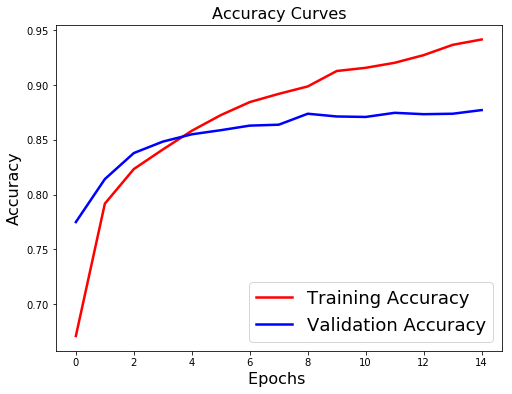

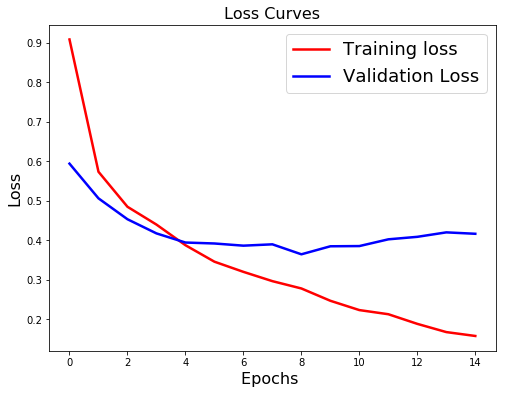

In [10]:

clothes(sc,history,test_file = "fashion-mnist_test_small.csv")